<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/master/Optics/CurveFittingForDiffractionPattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- - - -
# Curve Fitting Tutorial for Diffraction Pattern

- - - -

Martin Veillette @ Berea College

- - - -


In [57]:
# import modules
import numpy as np
from numpy import array, arange, pi, exp, sin, cos, polyfit, poly1d, linspace, zeros, flipud
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
from scipy.optimize import fmin
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16,12)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## Non-linear least squares using fmin optimization

Consider some data points (X,Y)

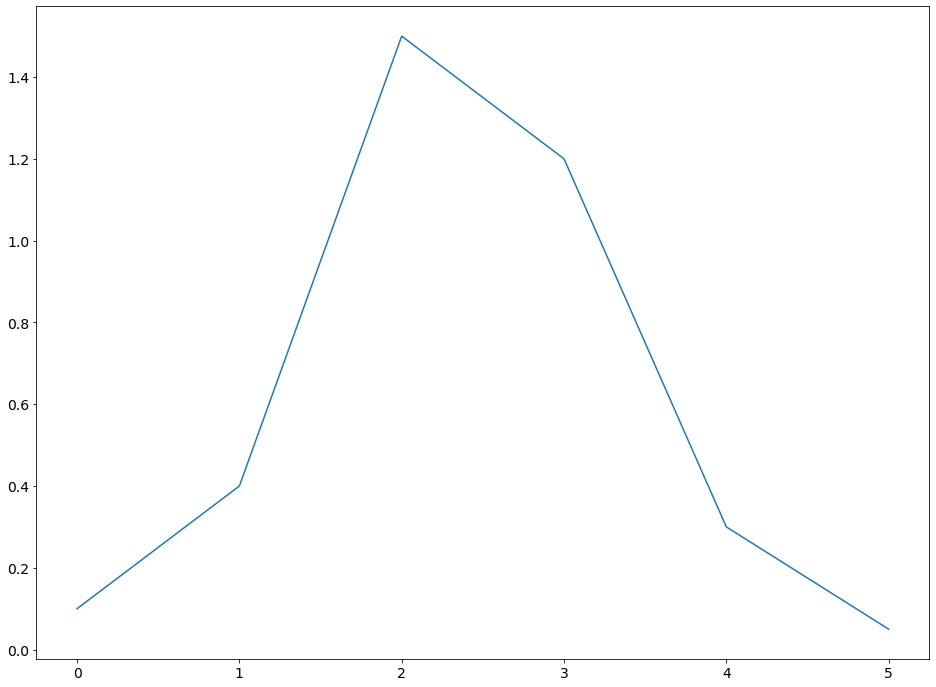

In [58]:
# 5 data points in an array
points= [(0,0.1),(1,0.4),(2,1.5),(3,1.2),(4,0.3),(5,0.05)]

# separate the X and Y points in distinct arrays
X = [pair[0] for pair in points]
Y = [pair[1] for pair in points]

plt.plot(X,Y)
plt.show()

The graph is similar to a gaussian curve. 
Let's attempt to fit a gaussian function to the data
$$Y= Y_{max} \exp{\left[-\left( \frac{X-X_0}{\sigma}\right)^2 \right]} $$

For the purpose of the calculation, let's define the above function as "predictedFunction" where the three free parameters $\left\{ Y_{max}, X_0, \sigma \right\} $ are represented as an array called '$u$' (for unknowns) made of the variables $\left\{ u[0], u[1], u[2] \right\} $ 
We are seeking the best values for these parameters. 

In [59]:
# The predictedFunction is a function of the array 'u' and 'X'
predictedFunction = lambda u,X: u[0]*exp(-((X-u[1])/u[2])**2)

The best fit, in the least square sense, attempts to minimize the sum of the squared of the residuals. 

The residuals are defined as the difference between the predicted function and the measured value, i.e. $ y_i - \textrm{testfunction}(x_i) $




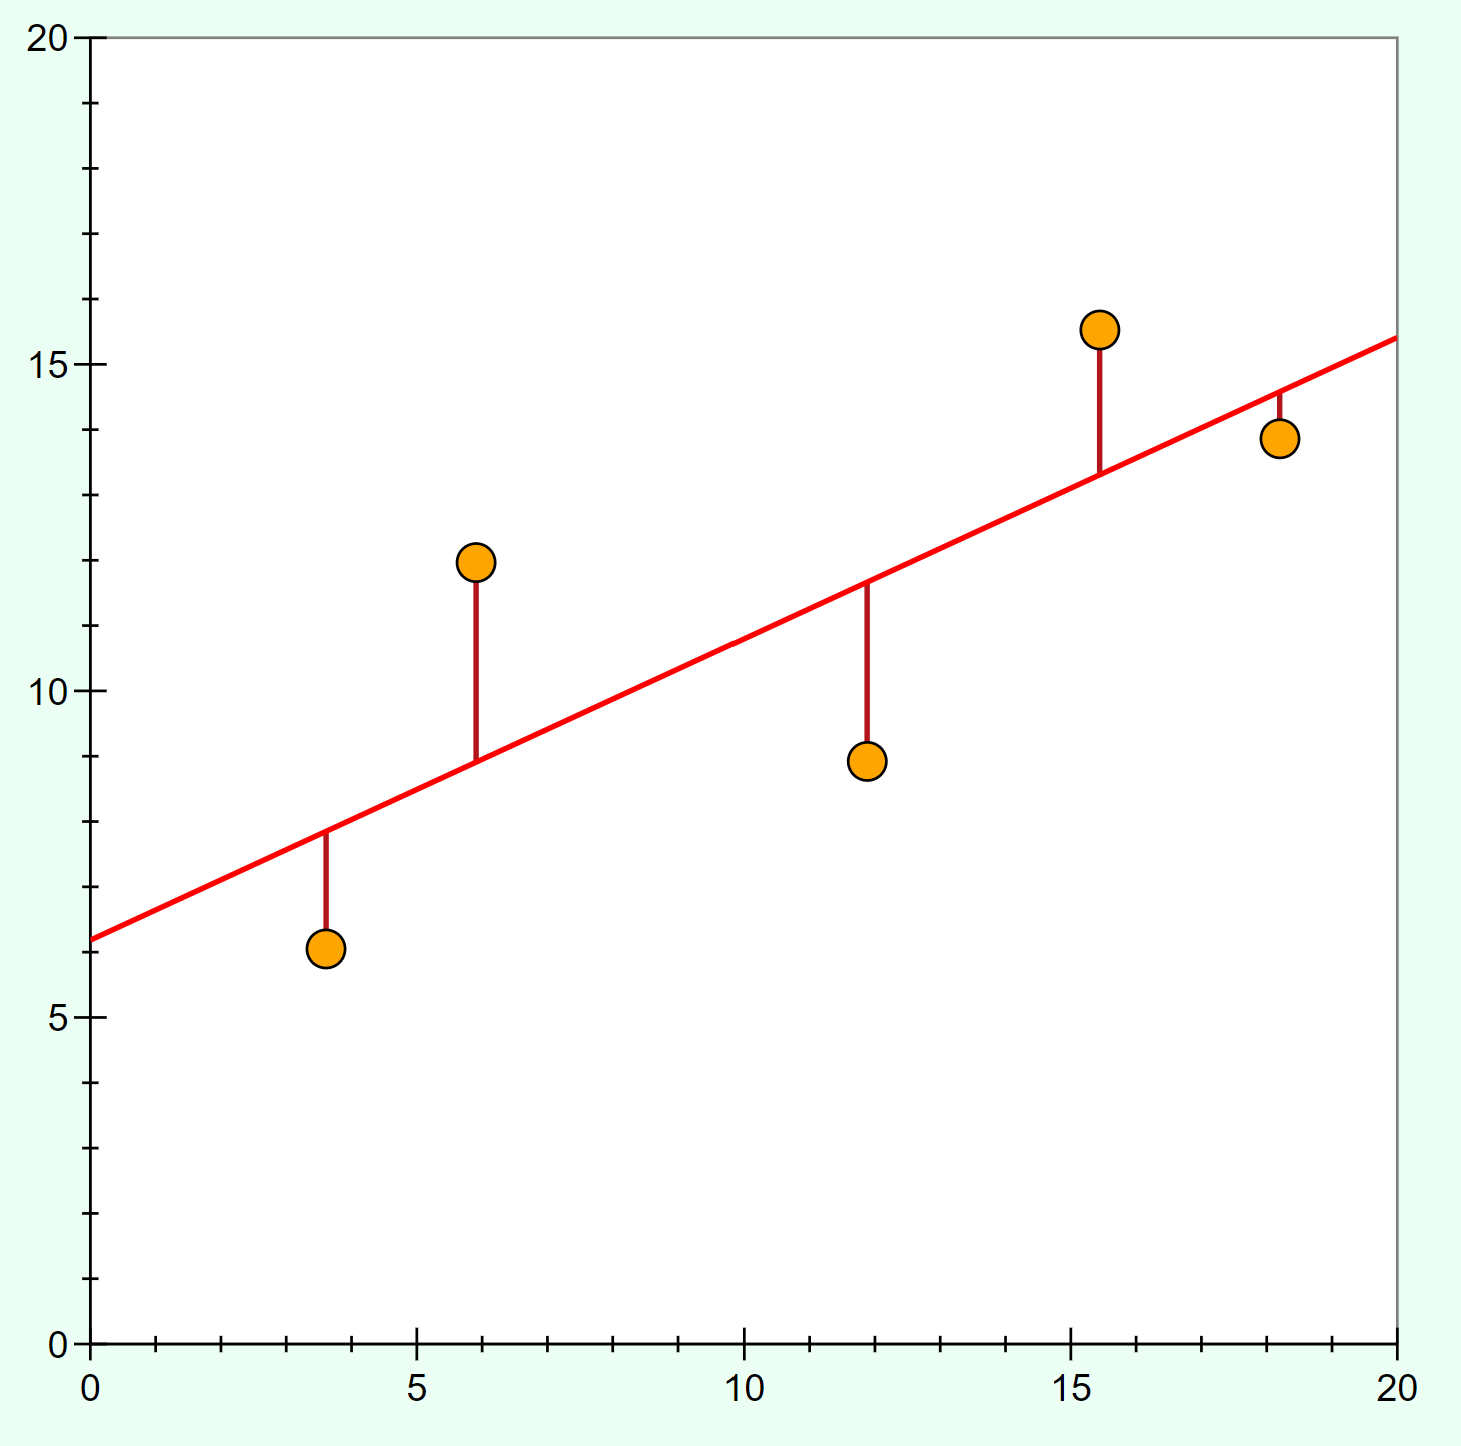


We want to set the values of 'u' such that $\chi$ is as small as possible.The goal of the least square regression is to find the parameters of 'u' such that it minimizes the square of the deviation, i.e.
$$ \chi(u) = \sum_{x_i} \left( y_i - \textrm{predictedFunction}(u,x_i) \right)^2 $$

We want to minimize χ. 



In [62]:
## define a function that is the square of the residuals squared
χ = lambda u: sum( (Y-predictedFunction(u,X))**2 )

At this point, we can ask scipy to minimize the function χ, in other words, find the best fitting parameters u[0],u[1] and u[2] that makes χ as small as possible ( χ is a positive definite function since it is by definition the square of the residuals)

In scipy, the function 'fmin' is a routine that 'attempts' to minimize a function starting with a hint from the user. The closer the hint the better it is at finding the minimum. It returns the value of the function at its minimum and the numbner of iterations it took to find it.


In [63]:
## the minimization function takes two arguments
## * (1) func= the function to be minimized
## * (2) x0 = an array with some initial guesses for the best fit parameters 
uGuess=[1.5,2,0.5]  # the amplitude is about 1.5, the mean of X is about 2 and the halfwidth is about 0.5
minimizationResults = fmin(func=χ, x0=uGuess)

Optimization terminated successfully.
         Current function value: 0.010997
         Iterations: 85
         Function evaluations: 156


Althought, it is interesting to know the value of χ, we are ultimately more interested in the best fit parameters

In [9]:
print('values of the fitting parameters')
print(minimizationResults)

values of the fitting parameters
[1.61716242 2.3704599  1.20387765]


Comparing to our original function, we find that 
$$Y_{max}=a_0=1.6171$$
$$X_0=a_1=2.370$$
$$\sigma=a_2=1.204$$

Let's plot the data points

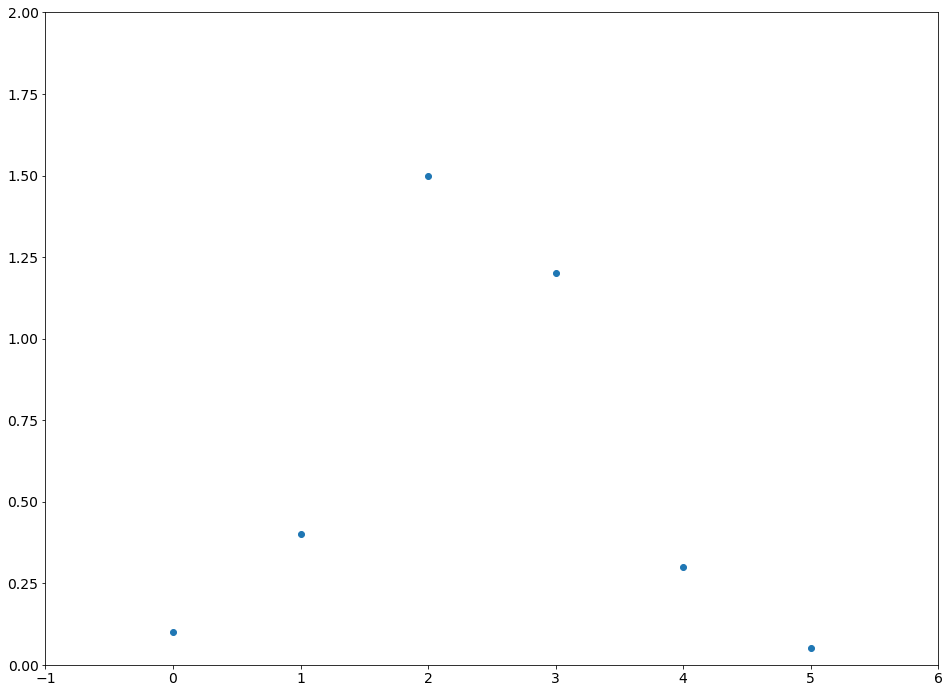

In [64]:
# Plot the data points as O's 
plt.plot(X, Y,'o')
plt.xlim([-1,6])
plt.ylim([0,2])
plt.show()

Let's plot the best fit function on a graph



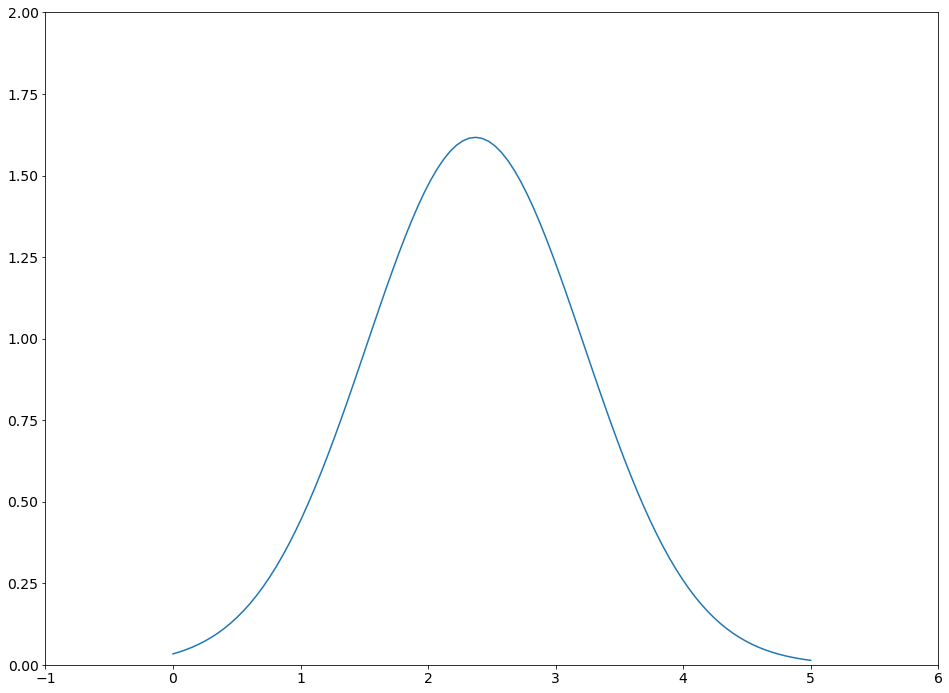

In [65]:

xRange = np.linspace(0,5,100) ## range of x values for curve
bestFit = predictedFunction(minimizationResults, xRange)

#plot x versus y
plt.plot(xRange, bestFit)

plt.xlim([-1,6])
plt.ylim([0,2])
plt.show()

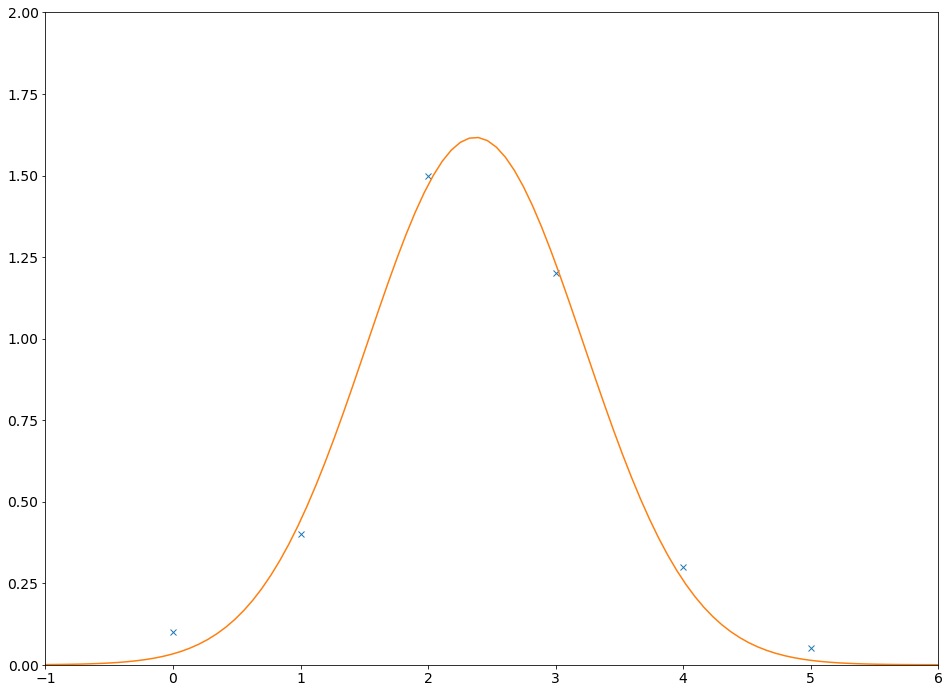

In [67]:
# Plot the data points as x's 
plt.plot(X, Y,'x')

# Plot the best fit line
xRange = np.linspace(-1,6,100) ## range of x values for curve
bestFit = predictedFunction(minimizationResults, xRange)

#plot x versus y
plt.plot(xRange, bestFit)

# plot range for x and y axes
plt.xlim([-1,6])
plt.ylim([0,2])

# plot the results
plt.show()

## Curve Fitting for Diffraction and Interference from two-Slits

In [25]:
import pandas

# the data in the folder content may get erased by colab
df = pandas.read_excel('ExcelFakeDataInterference.xlsx', sheet_name='Sheet1')

In [35]:
df.iloc[:,:]

,X,I,9
0,-0.050000,0.210142,0.008
1,-0.048991,0.249856,140.000
2,-0.047991,0.174419,499.000
3,-0.046991,0.166206,0.040
4,-0.045991,0.091406,NaN
...,...,...,...
95,0.045009,0.295866,NaN
96,0.046009,0.272844,NaN
97,0.047009,0.154178,NaN
98,0.048009,0.163331,NaN


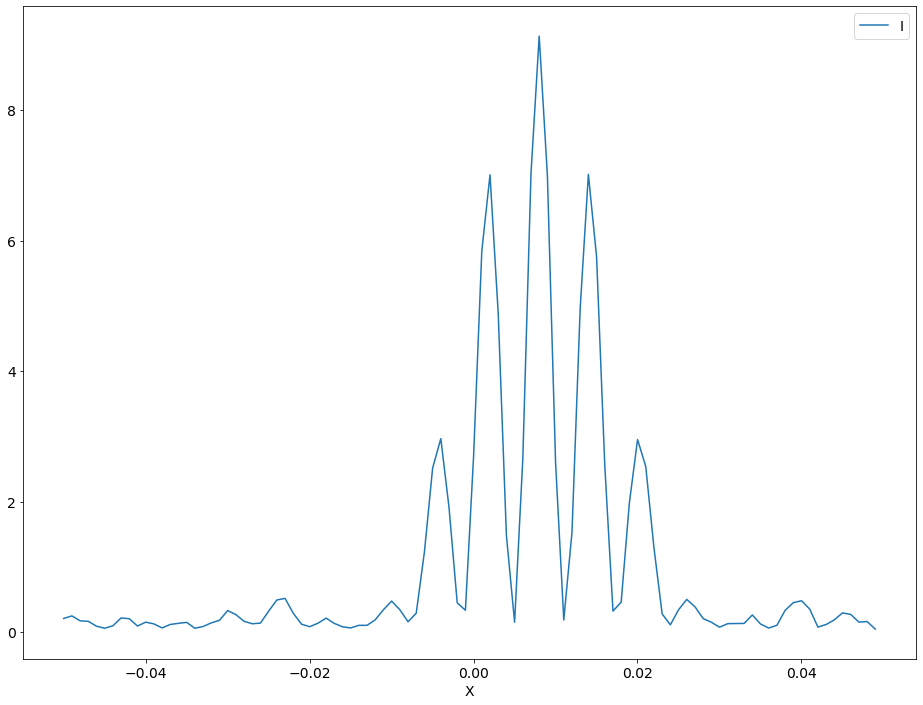

In [68]:
df.plot(x='X',y='I');

In [38]:
unpackedArray = df.values

In [39]:
# fmin optization
X = unpackedArray[:,0]
Y = unpackedArray[:,1]

# Best fit function

The intensity function as a fiunction of angle $\theta$ is predicted to follow
$$ I(\theta) =I_0 \left[ \frac{\sin{\left(\beta \theta \right)}}{\beta \theta} \right]^2  \times \left[ \cos{\left(\alpha \theta\right)} \right]^2 $$

where $$\beta= \frac{\pi D}{\lambda},$$ $$\alpha= \frac{\pi d}{\lambda}.$$ $D$ is the width of a slit and $d$ is the separation of the two slits

# Experimental Complications


The angle $\theta$ in the above formula is measured from the center of the two slits. In practice, this center position is difficult to establish. In addition, the intensity is measured as a function of the distance rather than angle
The angle is given by 
$$ \tan(\theta) = \frac{x-x_o}{L} $$
where $x_o$ is the center position and $L$ is the distance between the two slits and the screen.
Using the small angle approximation, 
$$ \theta = \frac{x-x_o}{L} $$


An additional complication is that the photo diode is immersed in ambient light and therefore the intensity does not go to zero at large distance.

As a result, the intensity can be described as

$$ I(x) =I_0 \left[ \frac{\sin{\left(\frac{\beta }{L} (x-x_0) \right)}}{\frac{\beta}{L} (x-x_0)} \right]^2  \times \left[ \cos{\left( \frac{\alpha }{L} (x-x_0)\right)} \right]^2 +I_{\textrm{background}}$$


We need to rewrite the above function in terms of free parameters. There are five of them
\begin{align}
u[0]&=I_0 \\
u[1]&=\frac{\pi D}{\lambda L} \\
u[2]&=\frac{\pi d}{\lambda L} \\
u[3]&=x_0 \\
u[4]&=I_\textrm{background}
\end{align}

The intensity equation becomes
$$ I= u[0] \left[ \frac{\sin{\left(u[1] (x-u[3]) \right)}}{ u[1] (x-u[3])} \right]^2  \times \left[ \cos{\left( u[2] (x-u[3])\right)} \right]^2 +u[4]$$

In [49]:
intensity = lambda u,X: u[0]*diffractionTerm(u[1],u[3],X)*interferenceTerm(u[2],u[3],X)+u[4]
diffractionTerm = lambda a,b,X : (sin(a*(X-b))/(a*(X-b)))**2
interferenceTerm = lambda a,b,X : (cos(a*(X-b)))**2
sumOfDeviationsSquared = lambda u: sum( (intensity(u,X)-Y)**2 )

Best for line for diffraction and interference pattern

In [50]:
#guessedParameters=[I_o,121,400,x_0,I_background]
guessedParameters=[10,121,400,0.01,0.9]
bestFitParameters = fmin(func=sumOfDeviationsSquared, x0=guessedParameters)
print(bestFitParameters)

Optimization terminated successfully.
         Current function value: 0.100705
         Iterations: 323
         Function evaluations: 525
[9.01693146e+00 1.40236065e+02 4.98951043e+02 7.99958940e-03
 9.13796083e-02]


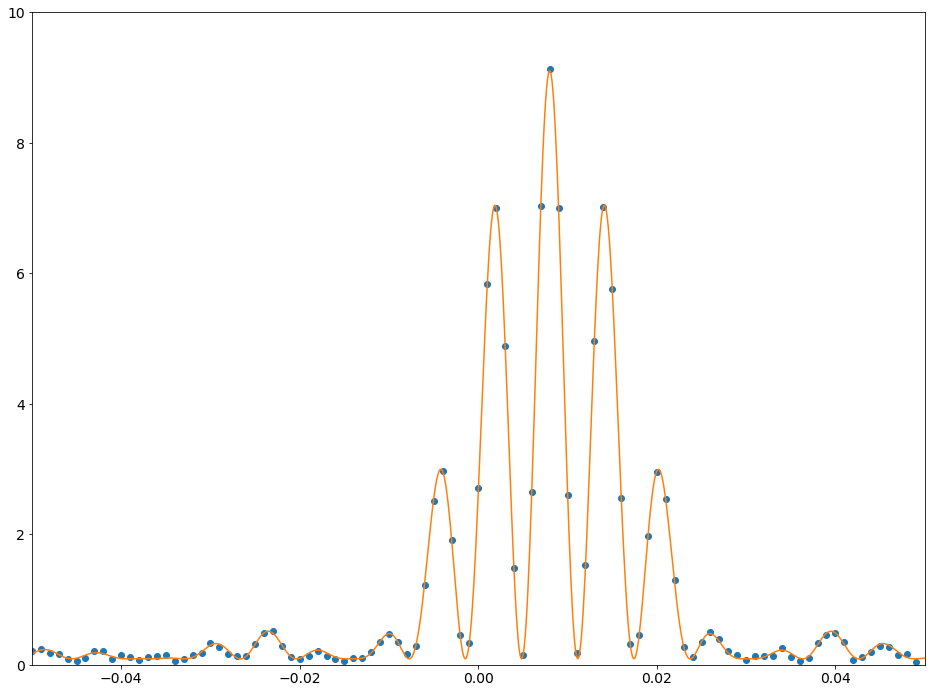

In [54]:
# Plot the data points from experiment as o's 
plt.plot(X, Y,'o')

# Plot the best fit line
xRange = np.linspace(-0.05,0.05,1000) # range of X to plot with a 1000 "steps"
bestFit = intensity(bestFitParameters,xRange)
plt.plot(xRange, bestFit)

# plot range for x and y axes
plt.xlim([-0.05,0.05])
plt.ylim([0,10])

# plot the results
plt.show()